# Limpieza de datos con PySpark: Data Science Job Posting on Glassdoor

Los [datos](https://tajamar365.sharepoint.com/:x:/s/3405-MasterIA2024-2025/ETYTQ0c-i6FLjM8rZ4iT1cgB6ipFAkainM-4V9M8DXsBiA?e=PeMtvh) fueron extraídos (scrapeados) del sitio web de Glassdoor y recoge los salarios de distintos puestos relacionados a Data.

dbfs:/FileStore/shared_uploads/mario.martin@tajamar365.com/ds_jobs-1.csv

### Resolver los siguientes requerimientos, para cada operación/moficación imprima como van quedadndo los cambios.

1. Cargar los datos y mostrar el esquema o la informacion de las columnas y el tip de dato de cada columna

In [0]:
df = spark.read.option("header", "true") \
               .option("delimiter", ";") \
               .option("multiline", "true") \
               .option("quote", "\"") \
               .option("escape", "\"") \
               .csv("dbfs:/FileStore/shared_uploads/mario.martin@tajamar365.com/ds_jobs-1.csv")

In [0]:
df.printSchema()
df.show(20)

root
 |-- index: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Salary Estimate: string (nullable = true)
 |-- Job Description: string (nullable = true)
 |-- Rating: string (nullable = true)
 |-- Company Name: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Headquarters: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Founded: string (nullable = true)
 |-- Type of ownership: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Revenue: string (nullable = true)
 |-- Competitors: string (nullable = true)

+-----+--------------------+--------------------+--------------------+------+--------------------+-----------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|           Job Title|     Salary Estimate|     Job Description|Rating|        Company Name|  

2. Eliminar duplicados

In [0]:
df = df.dropDuplicates()
df.show(5)

+-----+-----------------+--------------------+--------------------+------+--------------------+-----------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|        Job Title|     Salary Estimate|     Job Description|Rating|        Company Name|         Location|        Headquarters|                Size|Founded|   Type of ownership|            Industry|              Sector|             Revenue|         Competitors|
+-----+-----------------+--------------------+--------------------+------+--------------------+-----------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|    3|   Data Scientist|$137K-$171K (Glas...|JOB DESCRIPTION:\...|    35|        INFICON\n3.5|       Newton, MA|Bad Ragaz, Switze...|501 to 1000 emplo...|   2000|    Company - Public|Electrica

3. Decidir que hacer con los datos faltantes 

In [0]:
from pyspark.sql import functions as F

# Imprimimos la cantidad de datos nulos por columna
print("Datos nulos por columna:")
df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

Datos nulos por columna:
+-----+---------+---------------+---------------+------+------------+--------+------------+----+-------+-----------------+--------+------+-------+-----------+
|index|Job Title|Salary Estimate|Job Description|Rating|Company Name|Location|Headquarters|Size|Founded|Type of ownership|Industry|Sector|Revenue|Competitors|
+-----+---------+---------------+---------------+------+------------+--------+------------+----+-------+-----------------+--------+------+-------+-----------+
|    0|        0|              1|              1|     0|           0|       0|           0|   0|      0|                0|       0|     0|      0|          0|
+-----+---------+---------------+---------------+------+------------+--------+------------+----+-------+-----------------+--------+------+-------+-----------+



4. Decidir que hacer con los valores nulos

In [0]:
print(df.columns)
# Reemplazarlos por un valor predeterminado
df = df.na.fill({'Salary Estimate': 0, 'Job Title': 'Unknown'})  
df.show(5)

['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']
+-----+-----------------+--------------------+--------------------+------+--------------------+-----------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|        Job Title|     Salary Estimate|     Job Description|Rating|        Company Name|         Location|        Headquarters|                Size|Founded|   Type of ownership|            Industry|              Sector|             Revenue|         Competitors|
+-----+-----------------+--------------------+--------------------+------+--------------------+-----------------+--------------------+--------------------+-------+--------------------+--------------------+--------------------+--------------------+------------

5. ¿Cuántos registros tiene el csv?

In [0]:
print(f"Total de registros: {df.count()}")

Total de registros: 678


6. Mostrar los valores únicos de `Job title` 

In [0]:
df.select("Job Title").distinct().show()

+--------------------+
|           Job Title|
+--------------------+
|Business Intellig...|
|        Data Modeler|
|Senior Research S...|
|   Sr Data Scientist|
|Data Scientist/Ma...|
|Data Scientist / ...|
|Associate Data Sc...|
|Medical Lab Scien...|
|Human Factors Sci...|
|Experienced Data ...|
|     Data Analyst II|
|      Data Scientist|
|        Data Analyst|
|Senior Analyst/Da...|
|Data Scientist-Hu...|
|Data Scientist - ...|
|Data Scientist - ...|
|Business Intellig...|
|Staff Data Scient...|
|Data Scientist - ...|
+--------------------+
only showing top 20 rows



7. Remover la letra `K` de la columna `Salary Estimate` y multiplicar por 1000.

In [0]:
df = df.withColumn("Salary Estimate", regexp_replace(col("Salary Estimate"), "K", "").cast("double") * 1000)

8. Mostrar los valores únicos del campo `Salary Estimate`

In [0]:
# Mostrar los valores únicos del campo "Salary Estimate"
df.select("Salary Estimate").distinct().show(truncate=False)

+----------------------------+
|Salary Estimate             |
+----------------------------+
|$79K-$131K (Glassdoor est.) |
|$101K-$165K (Glassdoor est.)|
|$137K-$171K (Glassdoor est.)|
|$75K-$131K (Glassdoor est.) |
|$112K-$116K (Glassdoor est.)|
|$145K-$225K(Employer est.)  |
|$56K-$97K (Glassdoor est.)  |
|$124K-$198K (Glassdoor est.)|
|$69K-$116K (Glassdoor est.) |
|$90K-$124K (Glassdoor est.) |
|$110K-$163K (Glassdoor est.)|
|$91K-$150K (Glassdoor est.) |
|$71K-$123K (Glassdoor est.) |
|$79K-$106K (Glassdoor est.) |
|$122K-$146K (Glassdoor est.)|
|$141K-$225K (Glassdoor est.)|
|$90K-$109K (Glassdoor est.) |
|$99K-$132K (Glassdoor est.) |
|$79K-$133K (Glassdoor est.) |
|$31K-$56K (Glassdoor est.)  |
+----------------------------+
only showing top 20 rows



9. Eliminar `(Glassdoor est.)` y `(Employer est.)` del campo `Salary Estimate`

In [0]:
from pyspark.sql.functions import regexp_replace

# Eliminar los textos "(Glassdoor est.)" y "(Employer est.)" del campo "Salary Estimate"
df = df.withColumn("Salary Estimate", regexp_replace("Salary Estimate", r"\(Glassdoor est.\)|\(Employer est.\)", "").alias("Salary Estimate"))

# Mostrar valores únicos para verificar el cambio
df.select("Salary Estimate").distinct().show(truncate=False)


+---------------+
|Salary Estimate|
+---------------+
|$122K-$146K    |
|$79K-$147K     |
|$71K-$123K     |
|$90K-$109K     |
|$31K-$56K      |
|$124K-$198K    |
|$145K-$225K    |
|$141K-$225K    |
|$79K-$131K     |
|$99K-$132K     |
|$110K-$163K    |
|$75K-$131K     |
|$56K-$97K      |
|$137K-$171K    |
|$112K-$116K    |
|$79K-$133K     |
|$79K-$106K     |
|$90K-$124K     |
|$101K-$165K    |
|$91K-$150K     |
+---------------+
only showing top 20 rows



10. Mostrar de mayor a menor los valores del campo `Salary Estimate`

In [0]:
# Ordenar por el campo "Salary Estimate" en orden descendente
df.orderBy("Salary Estimate", ascending=False).select("Salary Estimate").distinct().show(truncate=False)

+---------------+
|Salary Estimate|
+---------------+
|$122K-$146K    |
|$79K-$147K     |
|$71K-$123K     |
|$90K-$109K     |
|$31K-$56K      |
|$124K-$198K    |
|$145K-$225K    |
|$141K-$225K    |
|$79K-$131K     |
|$99K-$132K     |
|$110K-$163K    |
|$75K-$131K     |
|$56K-$97K      |
|$137K-$171K    |
|$112K-$116K    |
|$79K-$133K     |
|$79K-$106K     |
|$90K-$124K     |
|$101K-$165K    |
|$91K-$150K     |
+---------------+
only showing top 20 rows



11. De la columna `Job Description` quitar los saltos de linea `\n` del texto

In [0]:
from pyspark.sql.functions import regexp_replace

# Eliminar los saltos de línea (\n) de la columna "Job Description"
df = df.withColumn("Job Description", regexp_replace("Job Description", r"\n", " "))

# Mostrar algunos registros para verificar el cambio
df.select("Job Description").distinct().show(truncate=False)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

12. De la columna `Rating` muestre los valores unicos.

In [0]:
df.select("Rating").distinct().show(truncate=False)

+------+
|Rating|
+------+
|29    |
|42    |
|34    |
|28    |
|22    |
|35    |
|47    |
|43    |
|31    |
|27    |
|41    |
|38    |
|44    |
|33    |
|48    |
|32    |
|36    |
|37    |
|39    |
|50    |
+------+
only showing top 20 rows



13. Del campo `Rating` reemplazar los `-1.0` por `0.0`.

In [0]:
from pyspark.sql.functions import when

# Reemplazar los valores -1.0 en la columna Rating por 0.0
df = df.withColumn("Rating", when(df["Rating"] == -1.0, 0.0).otherwise(df["Rating"]))

# Mostrar los valores únicos de la columna Rating después del reemplazo
df.select("Rating").distinct().show(truncate=False)

+------+
|Rating|
+------+
|29    |
|42    |
|34    |
|28    |
|22    |
|35    |
|47    |
|43    |
|31    |
|27    |
|41    |
|38    |
|44    |
|33    |
|48    |
|32    |
|36    |
|37    |
|39    |
|50    |
+------+
only showing top 20 rows



14. Mostrar los valores unicos y ordenar los valores del campo `Company Name`.

In [0]:
# Mostrar los valores únicos y ordenar los valores de la columna Company Name
df.select("Company Name").distinct().orderBy("Company Name").show(truncate=False)

+--------------------------------------+
|Company Name                          |
+--------------------------------------+
|0                                     |
|1-800-Flowers\n2.7                    |
|1010data\n3.1                         |
|10x Genomics\n4.2                     |
|1904labs\n4.7                         |
|22nd Century Technologies\n3.7        |
|7Park Data\n3.9                       |
|A Place for Mom\n2.7                  |
|A-Line Staffing Solutions\n4.1        |
|ABIOMED\n4.1                          |
|ALTA IT Services\n3.9                 |
|ASRC Federal Holding Company\n3.4     |
|AccessHope                            |
|Acuity Insurance\n4.8                 |
|Advance Sourcing Concepts\n3.4        |
|Advanced Bio-Logic Solutions Corp\n4.0|
|Advanced BioScience Laboratories\n2.7 |
|Adwait Algorithm\n4.4                 |
|AeroVironment\n4.2                    |
|Affinity Solutions\n2.9               |
+--------------------------------------+
only showing top

15. Quitar todos los caracteres innecesarios que encuentres en el campo `Company Name`. Por ejemplo los saltos de linea `\n`

16. En el campo `Location` convertir esa columna en dos: `City` y `State`. Las ciudades que tengas en `Location` asignar a la columna `City`. Lo mismo para `State`. Luego elimine la columna `Location`.

In [0]:
from pyspark.sql.functions import regexp_replace

# Quitar los caracteres innecesarios como los saltos de línea \n y otros posibles caracteres
df = df.withColumn("Company Name", regexp_replace("Company Name", r"\n", " "))

# Mostrar algunos registros para verificar el cambio
df.select("Company Name").distinct().show(truncate=False)

+----------------------------------------+
|Company Name                            |
+----------------------------------------+
|Analysis Group 3.8                      |
|ManTech 4.2                             |
|Old World Industries 3.1                |
|Triplebyte 3.2                          |
|XSELL Technologies 3.6                  |
|HG Insights 4.2                         |
|PNNL 3.7                                |
|Novetta 4.5                             |
|INFICON 3.5                             |
|Buckman 3.5                             |
|Mathematica Policy Research 3.4         |
|Insight Enterprises, Inc. 4.2           |
|Healthfirst 3.1                         |
|Tower Health 3.5                        |
|Upside Business Travel 4.1              |
|1904labs 4.7                            |
|Affinity Solutions 2.9                  |
|Guzman & Griffin Technologies (GGTI) 4.4|
|iRobot 3.5                              |
|Intuit - Data 4.4                       |
+----------

17. Repetir la misma lógica de la pregunta 16 pero para el campo `Headquarters`. En Headquarters dejar solo la ciudad, mientras que para el estado añadirla a una columna nueva ` Headquarter State`.

In [0]:
df = df.withColumn("Headquarter City", regexp_replace(col("Headquarters"), r",.*", ""))
df = df.withColumn("Headquarter State", regexp_replace(col("Headquarters"), r".*,", ""))
df = df.drop("Headquarters")

18. Muestre los valores únicos del campo `Headquarter State` 

In [0]:
df.select("Headquarter State").distinct().show()

+-----------------+
|Headquarter State|
+-----------------+
|               WA|
|               MO|
|            Japan|
|               NE|
|               AZ|
|               TN|
|               MA|
|               NY|
|               OH|
|               IL|
|               FL|
|               LA|
|               CA|
|      Switzerland|
|        Singapore|
|               PA|
|               NJ|
|               GA|
|               VA|
|               WI|
+-----------------+
only showing top 20 rows



19. Mostrar valores unicos del campo `Size`.

In [0]:
df.select("Size").distinct().show()

+-------------+
|         Size|
+-------------+
|5001 - 10000 |
|            0|
|   201 - 500 |
|    51 - 200 |
|      Unknown|
| 1001 - 5000 |
|      10000+ |
|  501 - 1000 |
|      1 - 50 |
+-------------+



20. Quitar 'employee' de los registros del campo `Size`. Elimine tambien otros caracteres basura.

In [0]:
df = df.withColumn("Size", regexp_replace(col("Size"), "employees", ""))

21. Reemplazar la palabra 'to' por '-' en todos los registros del campo `Size`. Reemplazar tambien '-1' por 'Unknown'. 

In [0]:
df = df.withColumn("Size", regexp_replace(col("Size"), "to", "-"))
df = df.withColumn("Size", regexp_replace(col("Size"), "-1", "Unknown"))

22. Mostrar el tipo de dato del campo `Type of ownership` y sus registros unicos.

In [0]:
# Mostrar el tipo de dato y los valores únicos de la columna Type of ownership
df.select("Type of ownership").printSchema()
df.select("Type of ownership").distinct().show(truncate=False)


root
 |-- Type of ownership: string (nullable = true)

+------------------------------+
|Type of ownership             |
+------------------------------+
|-1                            |
|Government                    |
|Subsidiary or Business Segment|
|Self-employed                 |
|Contract                      |
|Unknown                       |
|College / University          |
|Company - Private             |
|Nonprofit Organization        |
|Hospital                      |
|Private Practice / Firm       |
|Company - Public              |
|Other Organization            |
+------------------------------+



23. Cambiar '-1' por 'Unknown' en todos los registros del campo `Type of ownership`.

In [0]:
from pyspark.sql.functions import when

# Reemplazar '-1' por 'Unknown' en la columna 'Type of ownership'
df = df.withColumn("Type of ownership", when(df["Type of ownership"] == '-1', 'Unknown').otherwise(df["Type of ownership"]))


24. Cambiar:  
-  `Company - Public` por `Public Company`  
-  `Company - Private` por `Private Company`  
-  `Private Practice / Firm` por `Private Company`  
-  `Subsidiary or Business Segment` por `Business`  
-  `College / University` por `Education`  
En todos los registros del campo `Type of ownership`.

In [0]:
# Reemplazar ciertos valores en la columna 'Type of ownership'
df = df.withColumn("Type of ownership", 
    when(df["Type of ownership"] == 'Company - Public', 'Public Company')
    .when(df["Type of ownership"] == 'Company - Private', 'Private Company')
    .when(df["Type of ownership"] == 'Private Practice / Firm', 'Private Company')
    .when(df["Type of ownership"] == 'Subsidiary or Business Segment', 'Business')
    .when(df["Type of ownership"] == 'College / University', 'Education')
    .otherwise(df["Type of ownership"]))

25. Mostrar el tipo de dato y los valores unicos del campo `Industry`.

In [0]:
# Mostrar tipo de dato y valores únicos de la columna Industry
df.select("Industry").printSchema()
df.select("Industry").distinct().show(truncate=False)


root
 |-- Industry: string (nullable = true)

+----------------------------------------+
|Industry                                |
+----------------------------------------+
|-1                                      |
|Investment Banking & Asset Management   |
|Insurance Carriers                      |
|Energy                                  |
|Advertising & Marketing                 |
|IT Services                             |
|Chemical Manufacturing                  |
|Enterprise Software & Network Solutions |
|Internet                                |
|Electrical & Electronic Manufacturing   |
|Express Delivery Services               |
|Utilities                               |
|Biotech & Pharmaceuticals               |
|Staffing & Outsourcing                  |
|Research & Development                  |
|Consulting                              |
|Federal Agencies                        |
|Computer Hardware & Software            |
|Consumer Electronics & Appliances Stores|
|Aerospa

26. En el mismo campo de `Industry` reemplazar '-1' por 'Not Available' y '&' por 'and'.  Vuelva a imprimir los valores unicos en orden alfabético.

In [0]:
# Reemplazar '-1' por 'Not Available' y '&' por 'and' en la columna Industry
df = df.withColumn("Industry", 
    when(df["Industry"] == '-1', 'Not Available')
    .otherwise(df["Industry"]))
df = df.withColumn("Industry", regexp_replace("Industry", "&", "and"))


27. Para el campo `Sector`, muestre el tipo de dato y los valores únicos.

In [0]:
# Mostrar tipo de dato y valores únicos de la columna Sector
df.select("Sector").printSchema()
df.select("Sector").distinct().show(truncate=False)

root
 |-- Sector: string (nullable = true)

+----------------------------+
|Sector                      |
+----------------------------+
|Health Care                 |
|-1                          |
|Education                   |
|Insurance                   |
|Information Technology      |
|Government                  |
|Oil, Gas, Energy & Utilities|
|Finance                     |
|Real Estate                 |
|Non-Profit                  |
|Media                       |
|Biotech & Pharmaceuticals   |
|Telecommunications          |
|Accounting & Legal          |
|Travel & Tourism            |
|Aerospace & Defense         |
|Business Services           |
|Agriculture & Forestry      |
|Retail                      |
|Manufacturing               |
+----------------------------+
only showing top 20 rows



28. Aplica la misma lógica de la pregunta 26 pero sobre el campo `Sector`.

In [0]:
# Reemplazar valores en la columna Sector (si es necesario)
df = df.withColumn("Sector", 
    when(df["Sector"] == '-1', 'Not Available')
    .otherwise(df["Sector"]))

29. Para el campo `Revenue`, muestre el tipo de dato y los valores únicos en orden ascedente.

In [0]:
# Mostrar tipo de dato y valores únicos de la columna Revenue
df.select("Revenue").printSchema()
df.select("Revenue").distinct().show(truncate=False)

root
 |-- Revenue: string (nullable = true)

+--------------------------------+
|Revenue                         |
+--------------------------------+
|-1                              |
|$50 to $100 million (USD)       |
|$100 to $500 million (USD)      |
|0                               |
|$10 to $25 million (USD)        |
|$10+ billion (USD)              |
|$1 to $5 million (USD)          |
|$500 million to $1 billion (USD)|
|Unknown / Non-Applicable        |
|$25 to $50 million (USD)        |
|$5 to $10 billion (USD)         |
|$5 to $10 million (USD)         |
|$2 to $5 billion (USD)          |
|$1 to $2 billion (USD)          |
|Less than $1 million (USD)      |
+--------------------------------+



30. En el campo `Revenue`, cambiar:  
-  `-1` por `N/A`  
-  `Unknown / Non-Applicable` por `N/A`  
-  `Less than $1 million (USD)` por `Less than 1`
-  Quitar `$` y `(USD)`

In [0]:
# Reemplazar valores específicos en la columna Revenue
df = df.withColumn("Revenue", 
    when(df["Revenue"] == '-1', 'N/A')
    .when(df["Revenue"] == 'Unknown / Non-Applicable', 'N/A')
    .when(df["Revenue"] == 'Less than $1 million (USD)', 'Less than 1')
    .otherwise(df["Revenue"]))
df = df.withColumn("Revenue", regexp_replace("Revenue", r"\$|\(USD\)", ""))

31. Borrar el campo `Competitors`.

In [0]:
# Eliminar la columna Competitors
df = df.drop("Competitors")

32. Crear tres columnas: `min_salary` (salario mínimo), `max_salary` (salario maximo) y `avg_salary` (salario promedio) a partir de los datos del campo `Salary Estimate`.

In [0]:
from pyspark.sql.functions import split, col

# Separar los valores del campo Salary Estimate
df = df.withColumn("min_salary", split(df["Salary Estimate"], "-").getItem(0))
df = df.withColumn("max_salary", split(df["Salary Estimate"], "-").getItem(1))

# Convertir los valores a enteros
df = df.withColumn("min_salary", df["min_salary"].cast("int"))
df = df.withColumn("max_salary", df["max_salary"].cast("int"))
df = df.withColumn("avg_salary", (df["min_salary"] + df["max_salary"]) / 2)

33. Mostrar los valores unicos del campo `Founded` y el tipo de dato.

In [0]:
# Mostrar el tipo de dato y los valores únicos de la columna Founded
df.select("Founded").printSchema()
df.select("Founded").distinct().show(truncate=False)

root
 |-- Founded: string (nullable = true)

+-------+
|Founded|
+-------+
|2016   |
|2012   |
|1988   |
|2017   |
|2014   |
|2000   |
|1965   |
|1981   |
|1968   |
|2011   |
|1997   |
|1973   |
|1996   |
|1983   |
|1986   |
|2015   |
|1998   |
|1993   |
|2010   |
|1990   |
+-------+
only showing top 20 rows



34. Reemplazar '-1' por '2024' en todos los registros del campo `Founded`.

In [0]:
# Reemplazar '-1' por '2024' en el campo Founde
df = df.withColumn("Founded", when(df["Founded"] == '-1', 2024).otherwise(df["Founded"]))


35. Crear una nueva columna o campo que se llame `company_age` con los datos que se deducen del campo `Founded`.

In [0]:
# Crear la columna company_age
df = df.withColumn("company_age", 2024 - df["Founded"])

36. Crear una columna o campo que se llame: `Job Type` y en cada registro debe ir Senior, Junior o NA según los datos del campo `Job Title`.  
- Cambiar 'sr' o 'senior' o 'lead' o 'principal' por `Senior` en el campo `Job Type`. No olvidar las mayúsculas.
- Cambiar 'jr' o 'jr.' o cualquier otra variante por `Junior`.  
- En cualquier otro caso distinto a los anteriores añadir NA.

In [0]:
# Crear la columna Job Type
df = df.withColumn("Job Type", 
    when(df["Job Title"].rlike("(?i)sr|senior|lead|principal"), "Senior")
    .when(df["Job Title"].rlike("(?i)jr|junior"), "Junior")
    .otherwise("NA"))

37. Muestra los registros únicos del campo `Job Type`. 

In [0]:
# Mostrar los valores únicos del campo Job Type
df.select("Job Type").distinct().show(truncate=False)

+--------+
|Job Type|
+--------+
|Senior  |
|NA      |
|Junior  |
+--------+



38. Partiendo del campo `Job Description` se extraer todas o las principales skills solicitadas por las empresas, por ejemplo: Python, Spark , Big Data. Cada Skill debe ir en una nueva columna de tipo Binaria ( 0 , 1) o Booleana (True,  False) de modo que cada skill va ser una nueva columna y si esa skill es solicitada por la empresa colocar 1 sino colocar 0. Por ejemplo:  

In [0]:
# Hacer un ejemplo con las habilidades: Python, Spark, Big Data
df = df.withColumn("Python", when(df["Job Description"].rlike("(?i)python"), 1).otherwise(0))
df = df.withColumn("Spark", when(df["Job Description"].rlike("(?i)spark"), 1).otherwise(0))
df = df.withColumn("Big Data", when(df["Job Description"].rlike("(?i)big data"), 1).otherwise(0))


Por ejemplo:  
| Job Title         | Salary Estimate | Job Description                                 | Rating | Company Name       | Size       | Founded | Type of ownership         | Industry                       | Sector                         | Same State      | company_age | Python | Excel |
|--------------------|-----------------|-------------------------------------------------|--------|--------------------|------------|---------|---------------------------|--------------------------------|--------------------------------|----------------|-------------|--------|-------|
| Sr Data Scientist | 137000-171000   | Description The Senior Data Scientist is resp... | 3.1    | Healthfirst        | 1001-5000  | 1993    | Nonprofit Organization    | Insurance Carriers            | Insurance Carriers            | Same State      | 31          | 0      | 0     |
| Data Scientist    | 137000-171000   | Secure our Nation, Ignite your Future Join th... | 4.2    | ManTech            | 5001-10000 | 1968    | Public Company            | Research and Development      | Research and Development      | Same State      | 56          | 0      | 0     |
| Data Scientist    | 137000-171000   | Overview Analysis Group is one of the larges... | 3.8    | Analysis Group      | 1001-5000  | 1981    | Private Company           | Consulting                    | Consulting                    | Same State      | 43          | 1      | 1     |
| Data Scientist    | 137000-171000   | JOB DESCRIPTION: Do you have a passion for Da... | 3.5    | INFICON            | 501-1000   | 2000    | Public Company            | Electrical and Electronic Manufacturing | Electrical and Electronic Manufacturing | Different State | 24          | 1      | 1     |


39. Exportar dataset final a csv

In [0]:
cleaned_csv_path = "dbfs:/FileStore/shared_uploads/caso4_cleaned"
df.write.mode("overwrite").option("header", "true").csv(cleaned_csv_path)
print(f"Archivo limpio exportado como CSV en: {cleaned_csv_path}")

Archivo limpio exportado como CSV en: dbfs:/FileStore/shared_uploads/caso4_cleaned


In [0]:
df.display()

index Job Title Salary Estimate Job Description Rating Company Name Location Size Founded Type of ownership Industry Sector Revenue max_salary Headquarter City Headquarter State min_salary avg_salary company_age Job Type Python Spark Big Data 56 Senior Data Scientist $75K-$131K Benson Hill empowers innovators to develop more healthy, tasty and sustainable food by unlocking the natural genetic diversity of plants. Benson Hill's CropOS platform combines machine learning and big data with breeding techniques and plant biology to drastically accelerate and simplify the product development process. This platform allows for cost-effective and more efficient ways for companies to analyze and make improvements in plant genetics. Benson Hill brings a unique and holistic approach to our product and platform development, as we span a broader workflow involving trait and seed development, genome editing, and breeding all the way to creating better ingredients and varieties that tap a strong consumer demand for more flavorful and nutritious fruits and vegetables. More information can be found online at www.bensonhill.com. Follow us on Twitter at @BensonHillInc. Our Purpose and Core Values Our Core Values are a set of common principles we share that are fundamental to our company's identity. Be Bold! We redefine boundaries by providing new solutions to difficult problems. Together we are driven to transform the future and will not allow the fear of failure to prevent us from innovating. We voice our opinions, embrace change, and challenge each other to think creatively. Be Inspired! We redefine boundaries by providing new solutions to difficult problems. Together we are driven to transform the future and will not allow the fear of failure to prevent us from innovating. We voice our opinions, embrace change, and challenge each other to think creatively. Be Real! We understand who we are, what we want to achieve, and what it takes to get there. We hold each other accountable through timely, candid, and well-intentioned feedback. Together we engage in honest communication and healthy debate that leads to success through true alignment. Department Overview The Data Science & Platform Engineering Department leads the development of Benson Hill's crop design platform, CropOS which combines machine learning and big data with genome editing and plant biology to accelerate and simplify the product development process. The team partners with the Research & Development teams on the development of a portfolio of offerings (commercial, product, or platform related) that meet the needs of Benson Hill's business units. Position Summary We are actively seeking a Senior Data Scientist to join our rapidly growing Research and Development Department. The successful candidate will be responsible for developing and implementing environmental and geospatial models enabling field experimental design and optimization of product performance across testing environments. This person will work closely with Benson Hill data engineers, scientists and project leaders to maximize the impact of Benson Hill's product development programs. You Will: (Essential Duties and Responsibilities) Develop and refine geospatial data analysis, storage, and modeling systems. Conduct independent analyses of performance and use advanced approaches to identify predictive models in a geospatial framework. Participate in the design of hypothesis-driven experiments and analyses. Perform spatial and statistical analysis on experimental outputs and interpret results Communicate results in written and visual formats to scientists and program leaders. Identify opportunities for model enhancements and opportunities for new models to create value in the product discovery and testing pipeline. You Have: Education PhD preferred (minimum BS plus 4 years' experience), in applied mathematics, physics, engineering, statistics, ecology, or closely related field with formal training in statistics and exper

40. Extraer todos los insights posibles que sean de valor o utilidad. Cree nuevas columnas, agrupar,  filtrar hacer varios plots que muestren dichos insights que sean de utilidad para una empresa o para un usuario. Elabore conclusiones con los insights encontrados. 

### Reemplazo y Transformación de Datos

In [0]:
from pyspark.sql.functions import when, split, regexp_replace

# Reemplazar '-1' por 'Unknown' en la columna 'Type of ownership'
df = df.withColumn("Type of ownership", when(df["Type of ownership"] == '-1', 'Unknown').otherwise(df["Type of ownership"]))

# Reemplazar valores específicos en 'Type of ownership'
df = df.withColumn("Type of ownership", 
    when(df["Type of ownership"] == 'Company - Public', 'Public Company')
    .when(df["Type of ownership"] == 'Company - Private', 'Private Company')
    .when(df["Type of ownership"] == 'Private Practice / Firm', 'Private Company')
    .when(df["Type of ownership"] == 'Subsidiary or Business Segment', 'Business')
    .when(df["Type of ownership"] == 'College / University', 'Education')
    .otherwise(df["Type of ownership"]))

# Reemplazar '-1' por 'Not Available' y '&' por 'and' en 'Industry'
df = df.withColumn("Industry", 
    when(df["Industry"] == '-1', 'Not Available')
    .otherwise(df["Industry"]))
df = df.withColumn("Industry", regexp_replace("Industry", "&", "and"))

# Reemplazar '-1' por 'Not Available' en 'Sector'
df = df.withColumn("Sector", 
    when(df["Sector"] == '-1', 'Not Available')
    .otherwise(df["Sector"]))

# Reemplazar valores en 'Revenue'
df = df.withColumn("Revenue", 
    when(df["Revenue"] == '-1', 'N/A')
    .when(df["Revenue"] == 'Unknown / Non-Applicable', 'N/A')
    .when(df["Revenue"] == 'Less than $1 million (USD)', 'Less than 1')
    .otherwise(df["Revenue"]))
df = df.withColumn("Revenue", regexp_replace("Revenue", r"\$|\(USD\)", ""))

# Eliminar la columna 'Competitors'
df = df.drop("Competitors")

# Separar el campo 'Salary Estimate' en 'min_salary', 'max_salary', 'avg_salary'
df = df.withColumn("min_salary", split(df["Salary Estimate"], "-").getItem(0))
df = df.withColumn("max_salary", split(df["Salary Estimate"], "-").getItem(1))
df = df.withColumn("min_salary", df["min_salary"].cast("int"))
df = df.withColumn("max_salary", df["max_salary"].cast("int"))
df = df.withColumn("avg_salary", (df["min_salary"] + df["max_salary"]) / 2)

# Reemplazar '-1' por '2024' en el campo 'Founded'
df = df.withColumn("Founded", when(df["Founded"] == '-1', 2024).otherwise(df["Founded"]))

# Crear la columna 'company_age' a partir del campo 'Founded'
df = df.withColumn("company_age", 2024 - df["Founded"])

# Crear la columna 'Job Type' según los valores de 'Job Title'
df = df.withColumn("Job Type", 
    when(df["Job Title"].rlike("(?i)sr|senior|lead|principal"), "Senior")
    .when(df["Job Title"].rlike("(?i)jr|junior"), "Junior")
    .otherwise("NA"))



### Generación de Nuevas Columnas Binarias para Skills

In [0]:
# Crear columnas binarias para skills
df = df.withColumn("Python", when(df["Job Description"].rlike("(?i)python"), 1).otherwise(0))
df = df.withColumn("Spark", when(df["Job Description"].rlike("(?i)spark"), 1).otherwise(0))
df = df.withColumn("Big Data", when(df["Job Description"].rlike("(?i)big data"), 1).otherwise(0))

# Distribución de Salarios Promedio por Industria

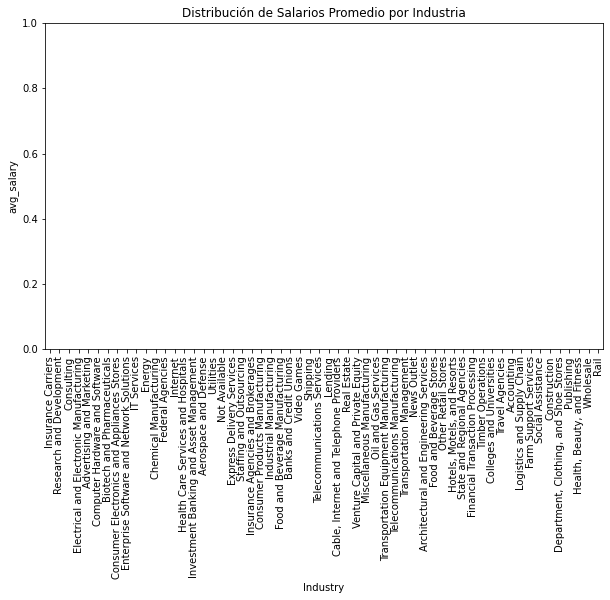

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir el DataFrame a Pandas para usarlo con Seaborn o Matplotlib
df_pd = df.toPandas()

# Ejemplo de gráfico de distribución de salarios promedio por industria
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pd, x="Industry", y="avg_salary")
plt.xticks(rotation=90)
plt.title("Distribución de Salarios Promedio por Industria")
plt.show()